# Covid US Time Series

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

Import data for cases as a csv files

In [244]:
cases_csv = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_csv = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

Create dataframes from csv files

In [245]:
cases = pd.read_csv(cases_csv, error_bad_lines=False)
deaths = pd.read_csv(deaths_csv, error_bad_lines=False)

## Set up DataFrames

Set states as index and delete all columns other than dates

In [248]:
cases = cases.reset_index().set_index('Province_State')
deaths = deaths.reset_index().set_index('Province_State')

date_range = list(cases.columns.values)[11:]
cases = cases[date_range].copy()
deaths = deaths[date_range].copy()

In [249]:
cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guam,0,0,0,0,0,0,0,0,0,0,...,45,51,55,56,58,69,77,82,84,93
Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,6,6,6,6
Puerto Rico,0,0,0,0,0,0,0,0,0,0,...,64,79,100,127,174,239,286,316,316,452
Virgin Islands,0,0,0,0,0,0,0,0,0,0,...,17,19,22,0,0,30,30,30,37,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,0,0,0,0,0,0,0,0,0,0,...,69,67,0,125,274,274,303,344,501,483
West Virginia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wisconsin,0,0,0,0,0,0,0,0,0,0,...,0,61,0,0,0,0,0,0,0,0


In [250]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guam,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,3,3,4,4
Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Puerto Rico,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,6,8,11,12,15,18
Virgin Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Virginia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Wisconsin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,4,4


## Aggregate State Level Data

Aggregate the data for states.  Dropped Pacific Territories and Virgin Islands. Drop the Diamond Princess and the Grand Princess. Transpose the dataframes.

In [252]:
Aggregate_cases = cases.groupby(cases.index).sum()
Aggregate_deaths = deaths.groupby(deaths.index).sum()

dropped_rows = ['Diamond Princess',
                'Grand Princess',
                'American Samoa',
                'Guam',
                'Virgin Islands',
                'Northern Mariana Islands']
Aggregate_cases.drop(dropped_rows,inplace=True)
Aggregate_deaths.drop(dropped_rows, inplace=True)

Aggregate_cases = Aggregate_cases.transpose().copy()
Aggregate_deaths = Aggregate_deaths.transpose().copy()

In [253]:
Aggregate_cases

Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/26/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,987,119,1289,523,8210,2966,3128,319,495,6741,...,108,2391,3809,888,293,1249,5432,162,1412,109
4/1/20,1060,132,1530,584,9399,2982,3557,368,586,6956,...,129,2933,4355,888,321,1483,5608,191,1556,130
4/2/20,1233,143,1715,643,10773,3342,3824,393,653,9008,...,165,2845,5069,1092,338,1706,6389,216,1748,150
4/3/20,1495,157,1937,704,12004,3742,4914,450,757,10268,...,187,3067,5734,1253,389,2012,6846,237,2012,162


In [254]:
Aggregate_deaths

Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,23,3,24,8,173,69,69,10,9,85,...,1,23,54,5,13,27,225,1,25,0
4/1/20,27,3,29,10,199,69,85,11,9,87,...,2,24,66,5,16,34,234,1,27,0
4/2/20,32,3,32,12,238,80,112,12,12,164,...,2,36,77,7,17,41,271,2,38,0
4/3/20,38,3,41,12,265,97,131,14,15,170,...,2,41,100,7,17,46,291,2,51,0


Plot all states on a log scale chart

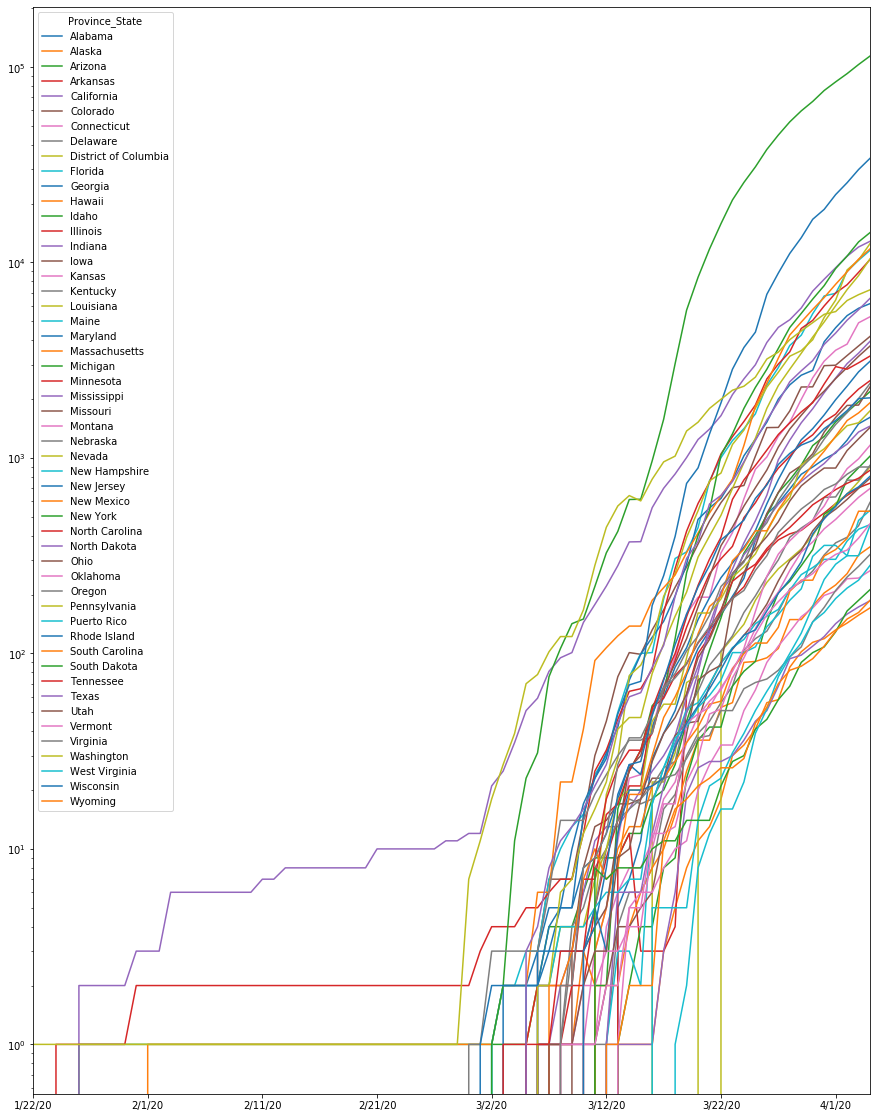

In [255]:
plt.rcParams['figure.figsize'] = [15,20]
Aggregate_cases.plot(kind="line")
plt.yscale("log")
plt.show()


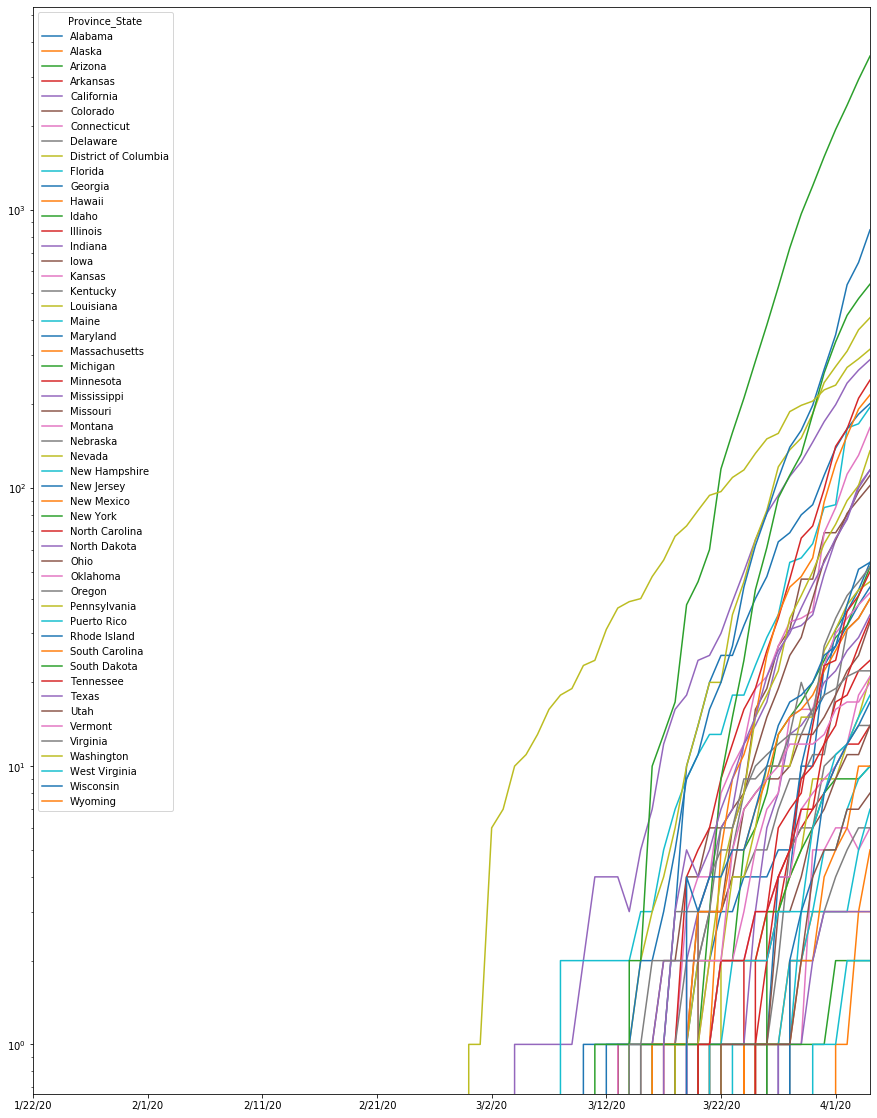

In [256]:
Aggregate_deaths.plot(kind="line")
plt.yscale("log")
plt.show()


## Start all data from a common number of cases or deaths

Create a dictionary of the number days until a specific number of cases and/or deaths was observed.

In [258]:
case_days = 10
death_days = 1

days_until_nth_case = Aggregate_cases[Aggregate_cases < case_days].count().to_dict()
days_until_nth_death = Aggregate_deaths[Aggregate_deaths < death_days].count().to_dict()

Shifted_cases = pd.DataFrame()
for col in Aggregate_cases.columns:
    Shifted_cases[col] = Aggregate_cases[col].shift(-days_until_nth_case[col])

Shifted_deaths = pd.DataFrame()
for col in Aggregate_deaths.columns:
    Shifted_deaths[col] = Aggregate_deaths[col].shift(-days_until_nth_death[col])

In [259]:
Shifted_cases

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,11.0,11.0,12.0,4.0,10.0,14.0,11.0,16.0,22.0,10.0,...,10.0,18.0,11.0,10.0,12.0,12.0,11.0,12.0,19.0,11.0
1/23/20,29.0,13.0,12.0,62.0,10.0,30.0,23.0,19.0,31.0,13.0,...,11.0,26.0,13.0,18.0,12.0,27.0,18.0,16.0,27.0,16.0
1/24/20,39.0,18.0,18.0,100.0,10.0,45.0,24.0,30.0,71.0,15.0,...,11.0,32.0,16.0,28.0,13.0,37.0,27.0,16.0,28.0,18.0
1/25/20,51.0,30.0,20.0,122.0,10.0,76.0,41.0,39.0,77.0,24.0,...,14.0,32.0,21.0,39.0,22.0,37.0,39.0,22.0,48.0,21.0
1/26/20,78.0,34.0,27.0,165.0,10.0,101.0,68.0,45.0,0.0,30.0,...,14.0,52.0,27.0,47.0,29.0,49.0,70.0,39.0,73.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/1/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/2/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/3/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
Shifted_deaths

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,NaN
1/23/20,1.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,...,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0,NaN
1/24/20,4.0,1.0,2.0,2.0,1.0,1.0,4.0,5.0,2.0,2.0,...,1.0,2.0,5.0,1.0,2.0,2.0,6.0,1.0,4.0,NaN
1/25/20,4.0,2.0,5.0,3.0,1.0,2.0,4.0,6.0,2.0,2.0,...,1.0,2.0,4.0,1.0,2.0,2.0,7.0,2.0,4.0,NaN
1/26/20,10.0,2.0,6.0,5.0,1.0,2.0,8.0,6.0,2.0,2.0,...,1.0,2.0,5.0,1.0,5.0,2.0,10.0,2.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/1/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/2/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/3/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


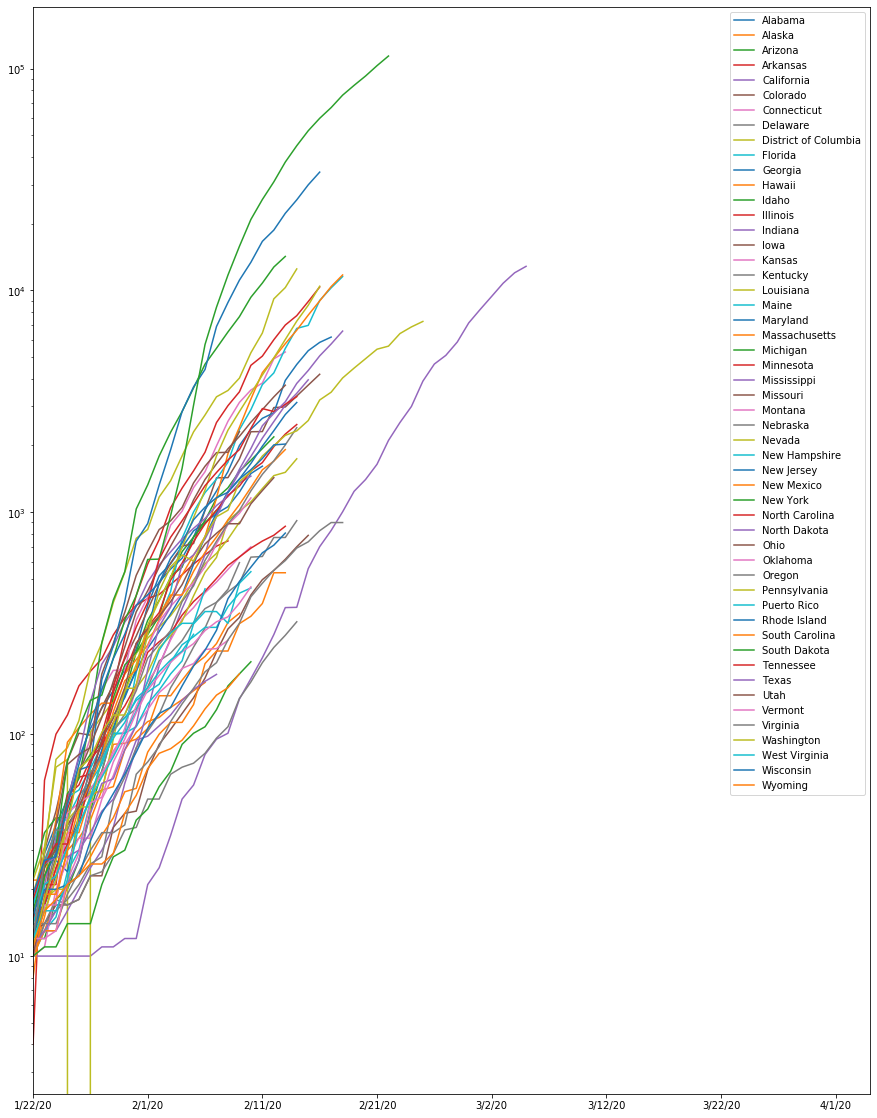

In [262]:
Shifted_cases.plot(kind="line")
plt.yscale("log")
plt.show()

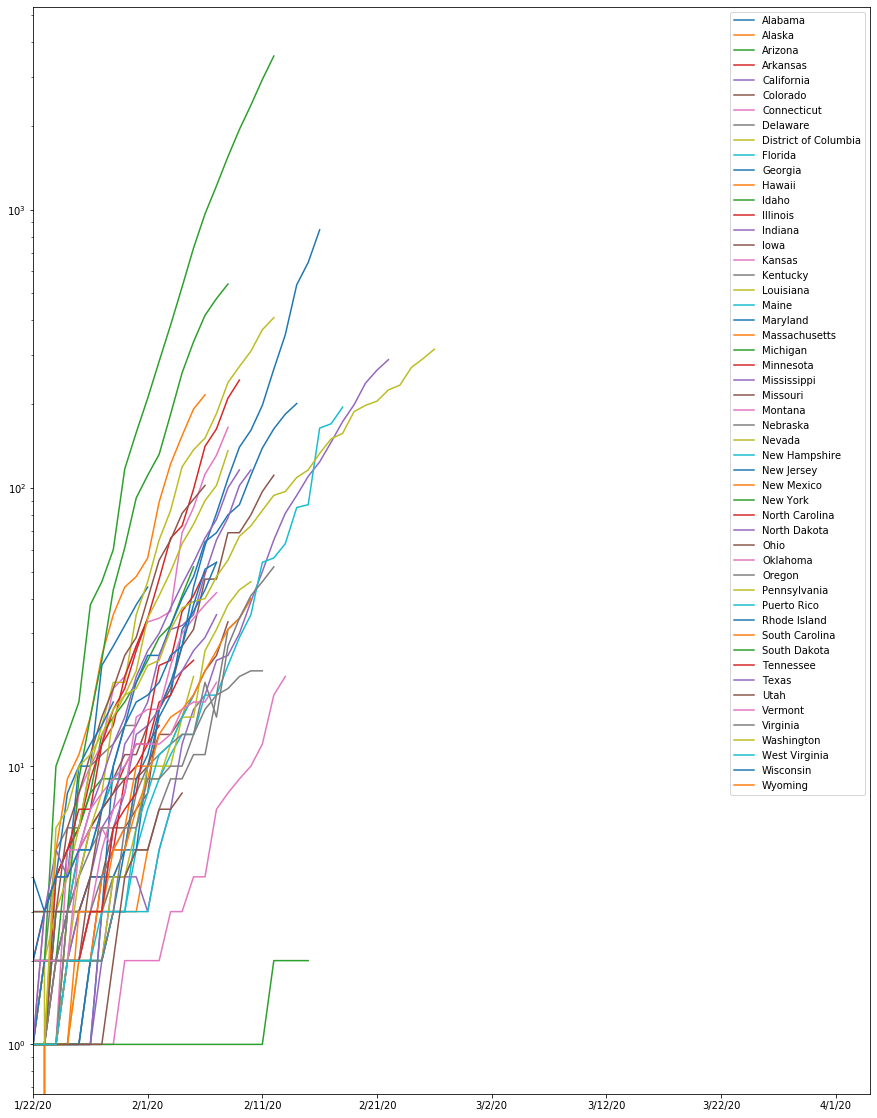

In [263]:
Shifted_deaths.plot(kind="line")
plt.yscale("log")
plt.show()

## Create moving averages

Create a moving average of the shifted data.

In [264]:
http://localhost:8888/notebooks/Desktop/projects/covid/US_time_series_cases.ipynb#Create-moving-averagesmoving_days = 3

Moving_cases = pd.DataFrame()
for col in Shifted_cases.columns:
    Moving_cases[col] = Shifted_cases.rolling(window=moving_days)[col].mean()
    
Moving_deaths = pd.DataFrame()
for col in Shifted_deaths.columns:
    Moving_deaths[col] = Shifted_deaths.rolling(window=moving_days)[col].mean()

In [265]:
Moving_cases

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,26.333333,14.000000,14.000000,55.333333,10.0,29.666667,19.333333,21.666667,41.333333,12.666667,...,10.666667,25.333333,13.333333,18.666667,12.333333,25.333333,18.666667,14.666667,24.666667,15.000000
1/25/20,39.666667,20.333333,16.666667,94.666667,10.0,50.333333,29.333333,29.333333,59.666667,17.333333,...,12.000000,30.000000,16.666667,28.333333,15.666667,33.666667,28.000000,18.000000,34.333333,18.333333
1/26/20,56.000000,27.333333,21.666667,129.000000,10.0,74.000000,44.333333,38.000000,49.333333,23.000000,...,13.000000,38.666667,21.333333,38.000000,21.333333,41.000000,45.333333,25.666667,49.666667,20.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/1/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/2/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/3/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
Moving_deaths

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,2.0,1.000000,1.666667,2.000000,1.0,0.666667,2.666667,2.666667,1.333333,2.0,...,1.0,1.333333,3.000000,1.0,2.0,1.333333,2.666667,1.000000,3.666667,NaN
1/25/20,3.0,1.333333,3.000000,2.333333,1.0,1.333333,3.666667,4.333333,2.000000,2.0,...,1.0,1.666667,4.000000,1.0,2.0,1.666667,4.666667,1.333333,3.666667,NaN
1/26/20,6.0,1.666667,4.333333,3.333333,1.0,1.666667,5.333333,5.666667,2.000000,2.0,...,1.0,2.000000,4.666667,1.0,3.0,2.000000,7.666667,1.666667,4.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/1/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/2/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/3/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot the moving average.

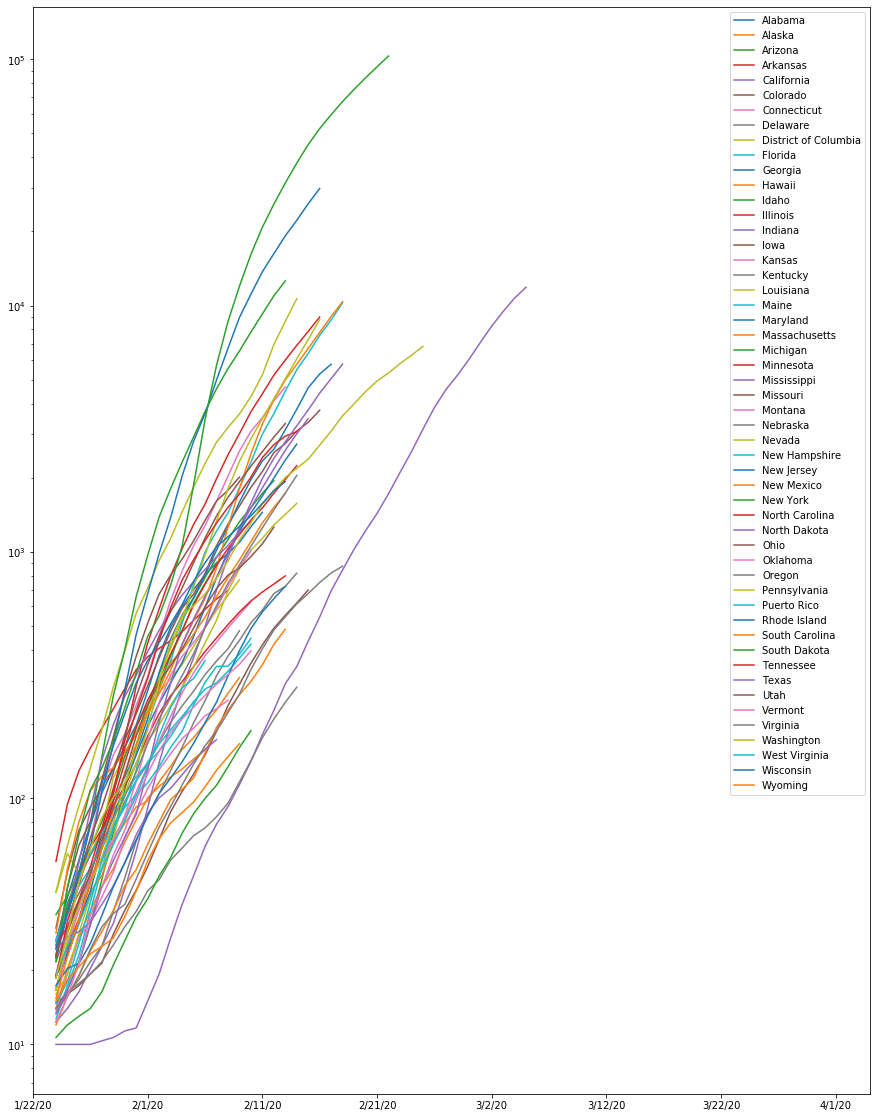

In [267]:
Moving_cases.plot(kind="line")
plt.yscale("log")
plt.show()


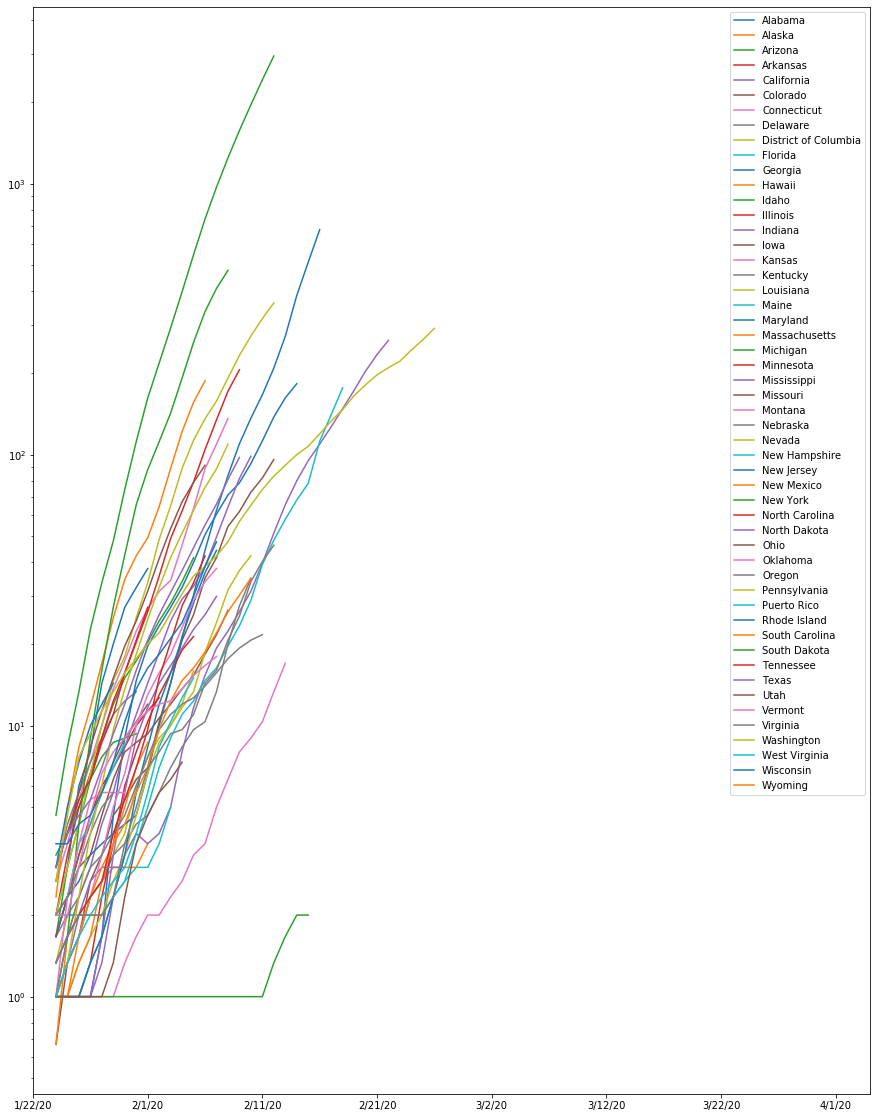

In [268]:
Moving_deaths.plot(kind="line")
plt.yscale("log")
plt.show()


Create a moving average of the aggregate data.

In [309]:
Moving_aggregate_cases = pd.DataFrame()
for col in Aggregate_cases.columns:
    Moving_aggregate_cases[col] = Aggregate_cases.rolling(window=moving_days)[col].mean()
    
Moving_aggregate_deaths = pd.DataFrame()
for col in Aggregate_deaths.columns:
    Moving_aggregate_deaths[col] = Aggregate_deaths.rolling(window=moving_days)[col].mean()

In [310]:
Moving_aggregate_cases

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1/26/20,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,903.666667,111.666667,1121.666667,474.000000,7066.666667,2528.000000,2564.000000,271.666667,412.666667,5486.666667,...,99.666667,2009.333333,3249.333333,804.000000,261.333333,1053.000000,4940.000000,140.000000,1268.666667,96.333333
4/1/20,982.000000,121.666667,1325.333333,526.666667,8249.000000,2753.000000,3085.333333,317.000000,494.000000,6390.000000,...,112.666667,2413.666667,3770.333333,860.000000,290.000000,1250.666667,5321.000000,166.000000,1399.333333,111.000000
4/2/20,1093.333333,131.333333,1511.333333,583.333333,9460.666667,3096.666667,3503.000000,360.000000,578.000000,7568.333333,...,134.000000,2723.000000,4411.000000,956.000000,317.333333,1479.333333,5809.666667,189.666667,1572.000000,129.666667
4/3/20,1262.666667,144.000000,1727.333333,643.666667,10725.333333,3355.333333,4098.333333,403.666667,665.333333,8744.000000,...,160.333333,2948.333333,5052.666667,1077.666667,349.333333,1733.666667,6281.000000,214.666667,1772.000000,147.333333


In [311]:
Moving_aggregate_deaths

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/26/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,14.333333,2.666667,20.333333,7.000000,147.666667,54.333333,46.333333,7.333333,7.666667,68.000000,...,1.000000,15.000000,45.333333,3.666667,12.333333,20.666667,209.333333,0.666667,21.000000,0.0
4/1/20,20.000000,3.000000,24.333333,8.333333,172.666667,61.666667,63.333333,9.000000,9.000000,78.333333,...,1.333333,20.333333,55.000000,4.666667,13.666667,25.333333,221.333333,1.000000,24.000000,0.0
4/2/20,27.333333,3.000000,28.333333,10.000000,203.333333,72.666667,88.666667,11.000000,10.000000,112.000000,...,1.666667,27.666667,65.666667,5.666667,15.333333,34.000000,243.333333,1.333333,30.000000,0.0
4/3/20,32.333333,3.000000,34.000000,11.333333,234.000000,82.000000,109.333333,12.333333,12.000000,140.333333,...,2.000000,33.666667,81.000000,6.333333,16.666667,40.333333,265.333333,1.666667,38.666667,0.0


Plot the moving average.

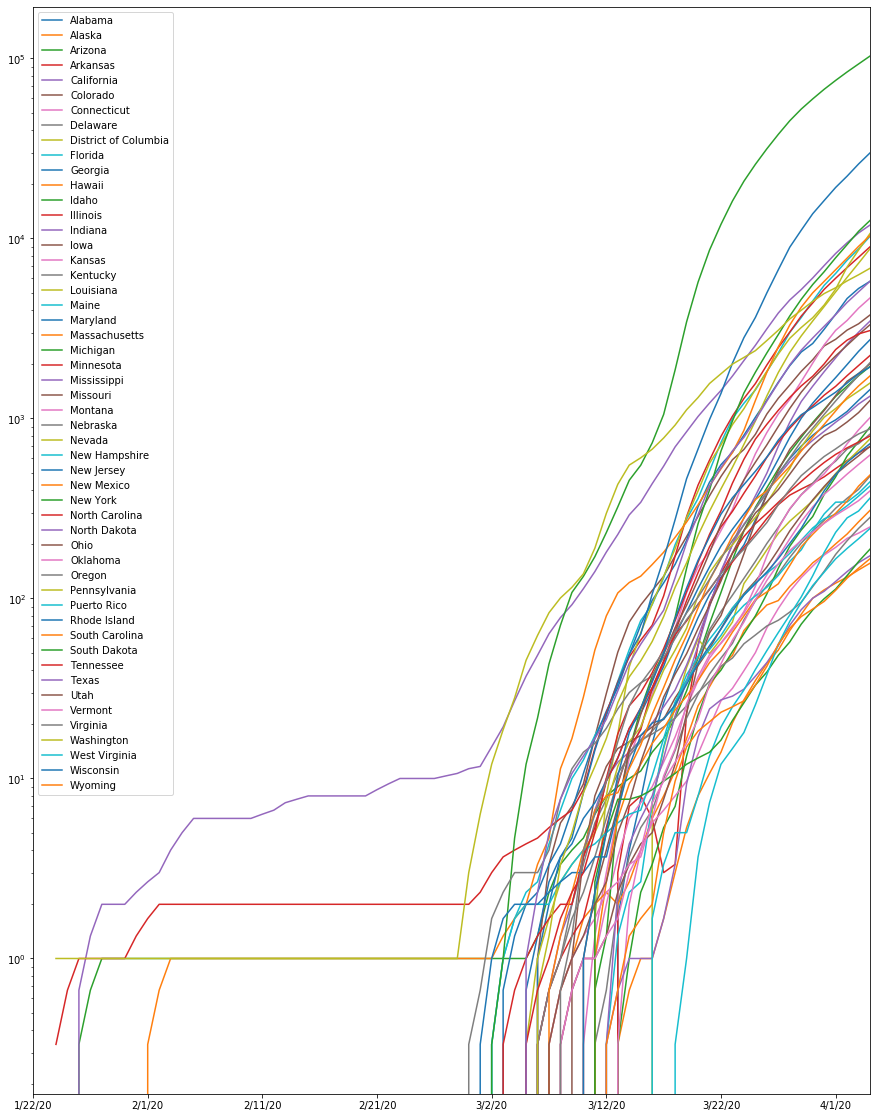

In [312]:
Moving_aggregate_cases.plot(kind="line")
plt.yscale("log")
plt.show()


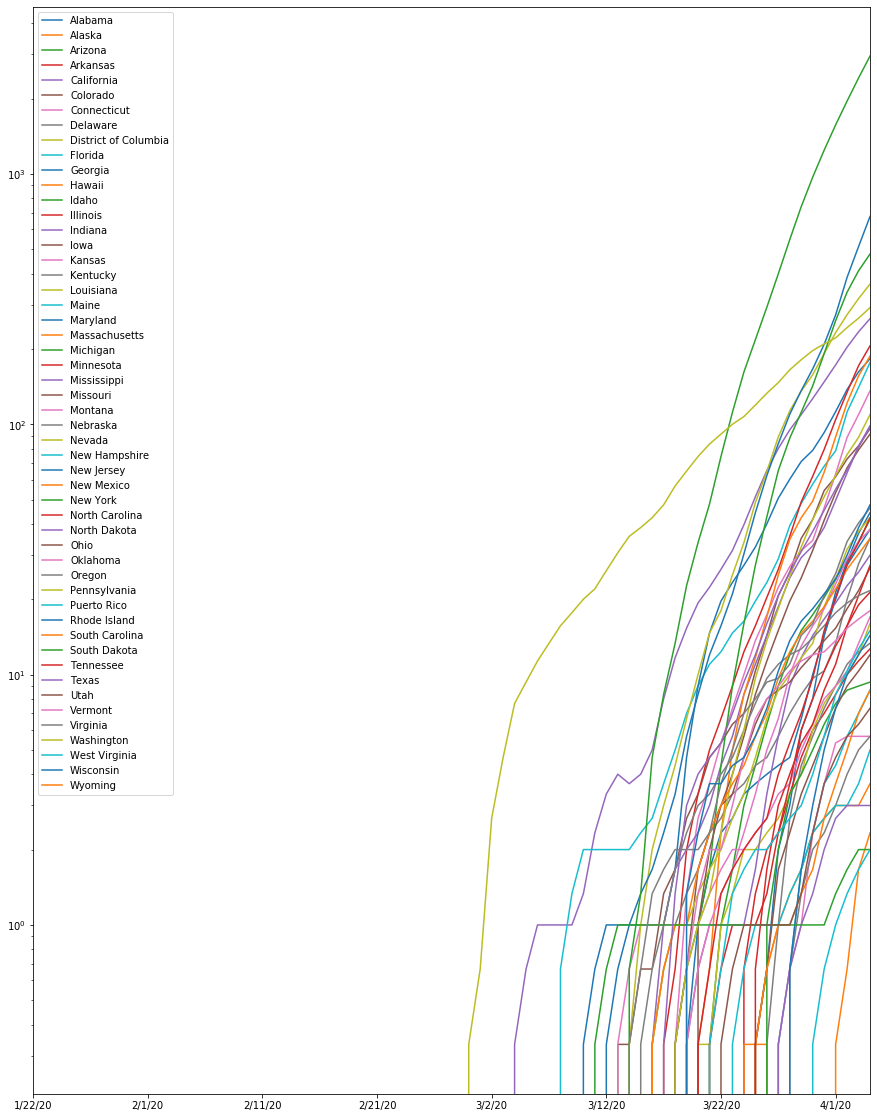

In [315]:
Moving_aggregate_deaths.plot(kind="line")
plt.yscale("log")
plt.show()


## Compare two states cases and deaths

          Virginia  Virginia  California  California
1/22/20        NaN       NaN         NaN         NaN
1/23/20        NaN       NaN         NaN         NaN
1/24/20  25.333333  1.333333        10.0         1.0
1/25/20  33.666667  1.666667        10.0         1.0
1/26/20  41.000000  2.000000        10.0         1.0
...            ...       ...         ...         ...
3/31/20        NaN       NaN         NaN         NaN
4/1/20         NaN       NaN         NaN         NaN
4/2/20         NaN       NaN         NaN         NaN
4/3/20         NaN       NaN         NaN         NaN
4/4/20         NaN       NaN         NaN         NaN

[74 rows x 4 columns]


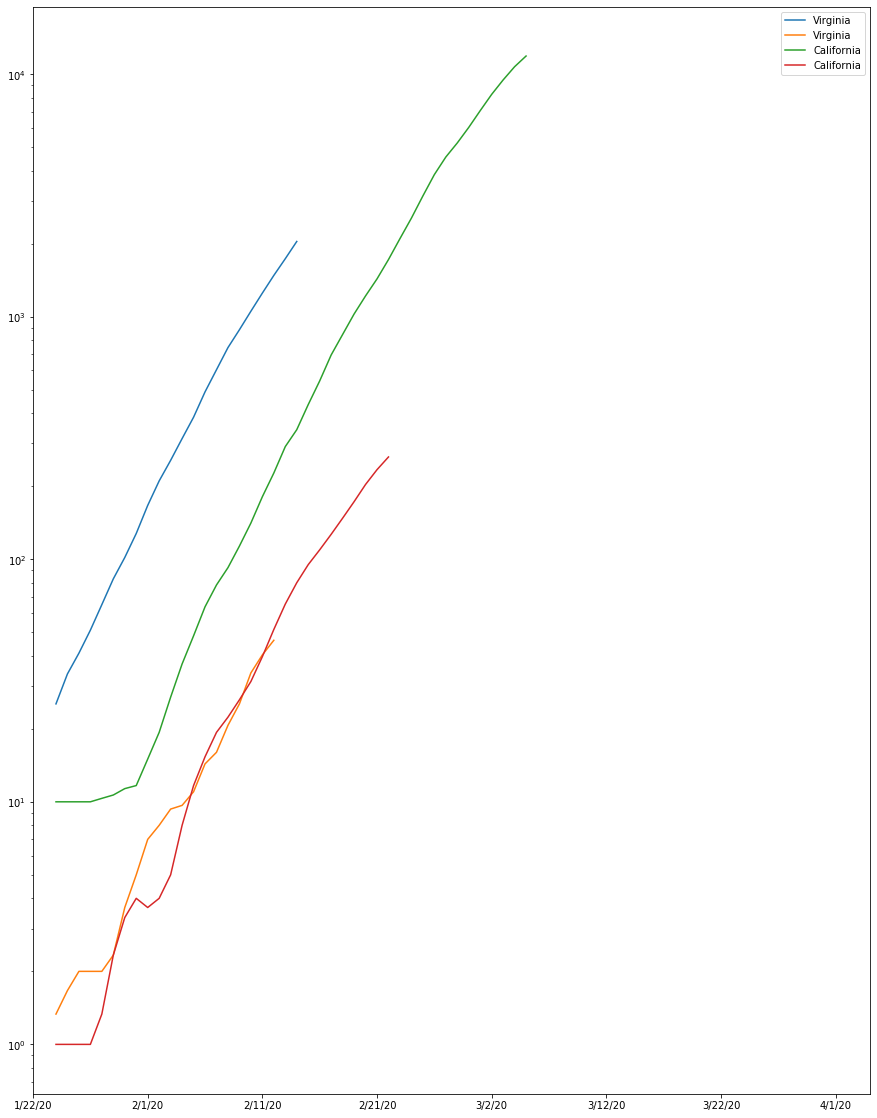

In [317]:
state_1 = 'Virginia'
state_2 = 'California'

state_data = pd.concat([Moving_cases[state_1],Moving_deaths[state_1],Moving_cases[state_2],Moving_deaths[state_2]], 
                       axis = 1)
print(state_data)
state_data.plot(kind="line")
plt.yscale("log")
plt.show()

## Calculate Daily Growth Rates from moving aggregate data

In [326]:
Growth_rate_cases = Moving_aggregate_cases.pct_change()
Growth_rate_cases

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1/26/20,NaN,NaN,inf,NaN,inf,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,0.121175,0.112957,0.181116,0.087156,0.172242,0.192828,0.263469,0.147887,0.182426,0.220887,...,0.154440,0.170940,0.161306,0.134525,0.116809,0.192075,0.104487,0.186441,0.103508,0.103053
4/1/20,0.086684,0.089552,0.181575,0.111111,0.167311,0.089003,0.203328,0.166871,0.197092,0.164642,...,0.130435,0.201228,0.160341,0.069652,0.109694,0.187718,0.077126,0.185714,0.102995,0.152249
4/2/20,0.113374,0.079452,0.140342,0.107595,0.146886,0.124834,0.135372,0.135647,0.170040,0.184403,...,0.189349,0.128159,0.169923,0.111628,0.094253,0.182836,0.091837,0.142570,0.123392,0.168168
4/3/20,0.154878,0.096447,0.142920,0.103429,0.133676,0.083531,0.169950,0.121296,0.151096,0.155340,...,0.196517,0.082752,0.145470,0.127266,0.100840,0.171924,0.081129,0.131810,0.127226,0.136247


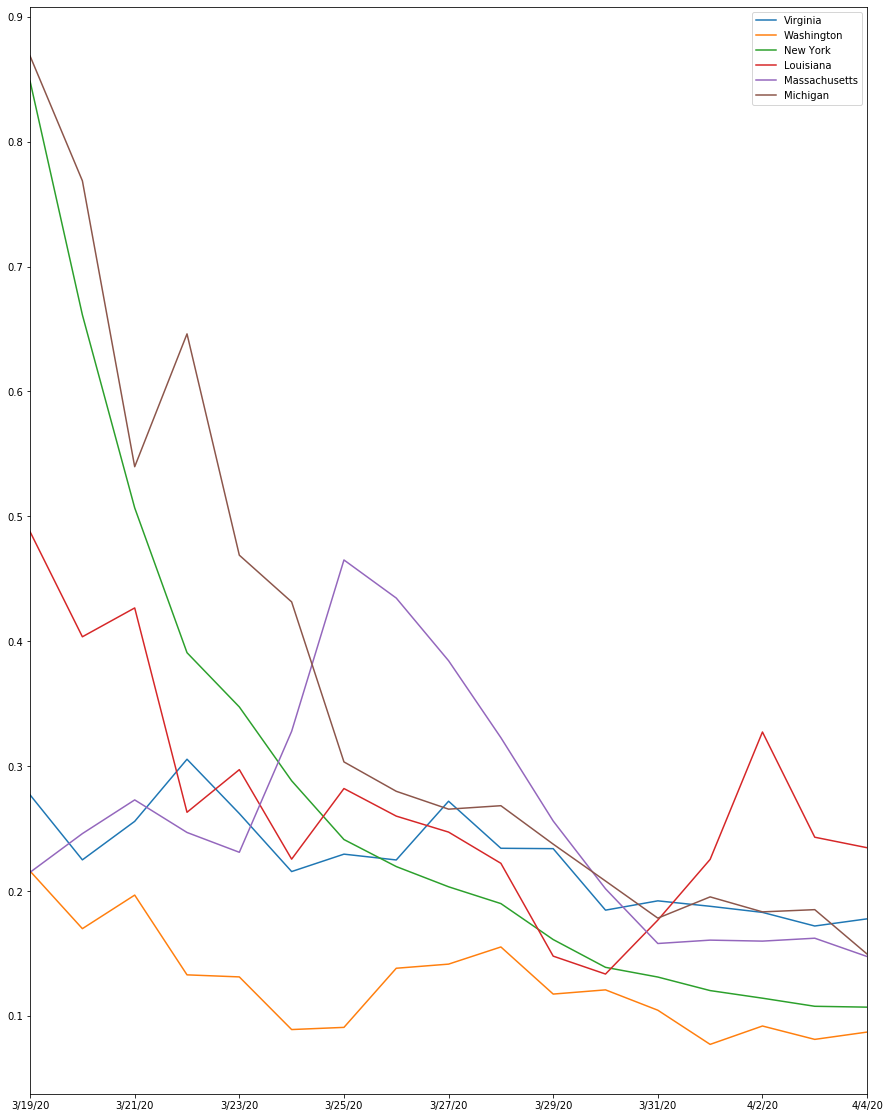

In [325]:
Growth_rate_cases[['Virginia','Washington','New York', 'Louisiana', 'Massachusetts', 'Michigan']].iloc[57:75].plot(kind = "line")
plt.show()